---   

# Part 1. Mini Project

### 비즈니스 문제를 해결하기 위해 데이터로 어떻게 접근, 해결할지 생각해보는 문제
    - Q. 1~3 문제 : 잔존율 증가를 위한 비즈니스 문제해결 
    - Q. 4~6 문제 : 금융권 VIP 고객의 연간 소비금액을 예측하기 위한 모델 구축 작업
    - Q. 7~8 문제 : 유저 세분화 및 그룹핑을 위한 데이터 분석 작업


### 머신러닝의 학습과정 및 활용에 대한 이해를 확인하는 문제
    - Q. 9 문제 : 손실함수의 필요성과 개념에 대한 이해
    - Q. 10~11 문제 : Gradient Descent의 과정과 SGD, MGD 처리 방식의 이해
    - Q. 12-13 문제 : 오버피팅 개념 및 해결방법에 대한 이해
    - Q. 14-15 문제 : CNN 및 RNN 의 동작원리에 대한 이해와 활용


- 작성자: 송훈화 감수자

---

## Q. 1~3. 잔존율 증가를 위한 비즈니스 문제해결 방안 마련

### 배경
다음과 같은 비즈니스 문제가 있다고 하자. 
현재 앱서비스의 잔존율이 정체되어 있는 상황이며 재이용자의 증가가 필수적인 상황이다. 여기서 잔존율이란 서비스를 이용하던 기존 유저가 시간이 흘러도 지속적으로 이용하고 있는 정도를 의미한다. 


### 목표
분석가에게 주어진 역할은 사내에 수집된 데이터를 추출해 잔존율을 높일 수 있는 방안을 유관팀에 공유하는 것이다. 유관팀은 개별 유저별로 잔존 여부를 예측할 수 있다면, 이를 근거로 개인화된 타깃팅을 진행할 수 있을 것이다. 분석가는 데이터를 근거로 유저들의 잔존 여부를 예측할 수 있는 모델을 구축하고자 한다. 즉 분석 목표는
   - 잔존 vs 비잔존 그룹간의 유저 행동 패턴을 이해하고,
   - 개별 유저의 잔존 여부(Y/N)를 예측할 수 있는 모델을 만드는 것이다.

위에 주어진 목표를 달성하기 위해 어떤 접근방법을 활용해야할지 각 단계별로 기술해보자.

---

### 1. 데이터 수집: 어떤 데이터를 수집/추출할 것인가?

# 1번

## 추출가능한 모델
* 회사 내부 데이터( 비잔존 그룹의 앱 이용 유형,잔존 그룹의 앱 이용 유형)
* 직접 수집한 데이터 ( 설문 )
* 외부 데이터( 기상청 데이터)

사내의 데이터 베이스에서 잔존 그룹과 비잔존 그룹으로 나누어서 각 그룹의 행동패턴을 확인하기 위해서 그룹의 로그 데이터를 수집하고 어떤 구매 형태를 보였는지 수집한다,또 비잔존 그룹이 떠난 이유를 추측하기 위해서 비잔존 그룹의 마지막 로그데이터를 수집한다 그리고 현재 잔존 그룹 중에서 어느정도 오랜 잔존률을 가진 유저들에게 설문을 해서 이 서비스에서 유저가 생각하기에 유용한 서비스가 무엇인지 확인한다 3번째로 외부데이터는 기상청의 데이터를 추출한다

### [리뷰어 답변]
#### 피드백
- 유저의 행동을 파악할 수 있는 데이터를 얻기위해서, 로그 데이터를 수집한다는 것은 바람직합니다.
- 잔존 그룹과 비잔존 그룹으로 나누어 수집하는 것을 통하여 잔존 그룹과 비잔존 그룹의 정보를 가지게 되므로 모델의 출력변수 (Y값, 종속변수, 목표변수)에 대한 언급도 적절히 하셨습니다. 다만, 나누어 수집한다는 개념보다는 전체를 수집하되, 해당 변수 그룹에 따라 나누어 볼 수 있도록 해당 변수 정보를 수집해야한다는 관점으로 보시는 것이 조금 더 자연스럽습니다.
- 해당 문항과 직접적인 관계는 없으나 외부 데이터, 설문데이터를 통한 분석 다각화의 접근 방법은 좋습니다.

#### 개선이 필요한 부분
- 그룹으로 나누어 그룹의 로그 데이터를 수집한다는 서술만으로는 각각의 유저 단위로 분석 대상 데이터를 구성할 지, 아니면 잔존 그룹, 비잔존 그룹별 요약 값으로 구성을 할지 명확하지 않습니다. (전자의 경우가 더욱 다양한 분석이 가능할 것이므로 메모리 등의 문제가 없다면 일반적으로 전자로 구성하는 것이 좋습니다.) 유니크한 ID에 대한 조금 더 구체적인 서술이 필요합니다.





### 2. 탐색적 데이터 분석: 유저의 행동패턴 이해를 위해 데이터 탐색을 어떻게 할 것인가?

# 2번

## 회사 내부데이터
일단 잔존 그룹과 비잔존 그룹의 차이를 알기위해 각 그룹의 로그 데이터에서 접속한 서비스 비율을 테이블로 만들어서 잔존 그룹의 겹치는 비잔존 그룹의 행을 제외 시켜서 잔존 그룹이 서비스를 계속 사용하는 이유를 파악한다 이 방식은 그룹에서 겹치는 변수를 제거하는 탐색방식이다

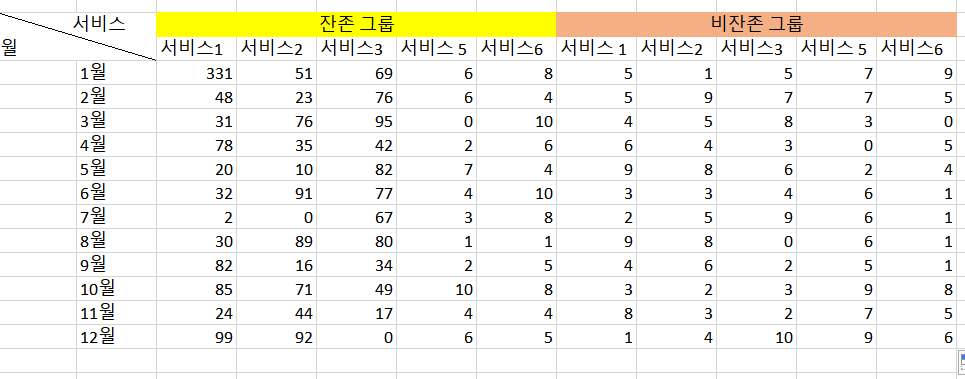

* 위 결과를 보면 서비스 1,2,3이 잔존 그룹의 잔존이유라는 것을 알 수 있다


## 직접 수집한 데이터
* 설문을 실행한 결과를 이용하여 역시 잔존그룹의 이 서비스를 이용하는 이유를 직접적으로 파악한다



## 외부 데이터

* 기상청의 날씨 데이터를 이용하여 각 날씨에 대한 어떤 서비스를 이용하는 지 수집하고 날씨변수와 잔존률 변수 사이의 관계를 탐색하여  잔존률 변수가 어떤 날씨 변수에 낮아지는 지 파악하고 해당 날씨에 비잔존 그룹에게 어필할 수 있는 컨텐츠를 만들어 낸다



### [리뷰어 답변]
#### 피드백
- 잔존 그룹 여부로 나누어 서비스 종류에 따른 cross table을 살펴 본 접근하는 방법은 매우 타당합니다. 

#### 개선이 필요한 부분
- 설문 혹은 로그 데이터에 포함될 수 있는 숫자형 변수의 경우에는 어떻게 접근할지에 대한 언급도 추가되면 더욱 좋겠습니다.



### 3. 모형 적합: 어떤 예측모형을 이용해 잔존 여부를 예측할 것인가?

# 3번

위 탐색데이터에서 유추된 변수를 이용하영 다음 예측 모형을 만들 수 있다 이 예측 모형의 사용자의 데이터를 대입하면 사용자가 현재 잔존확률이 측정된다 이 측정확률의 따라 YES,NO의 값을 유추할 수 있다

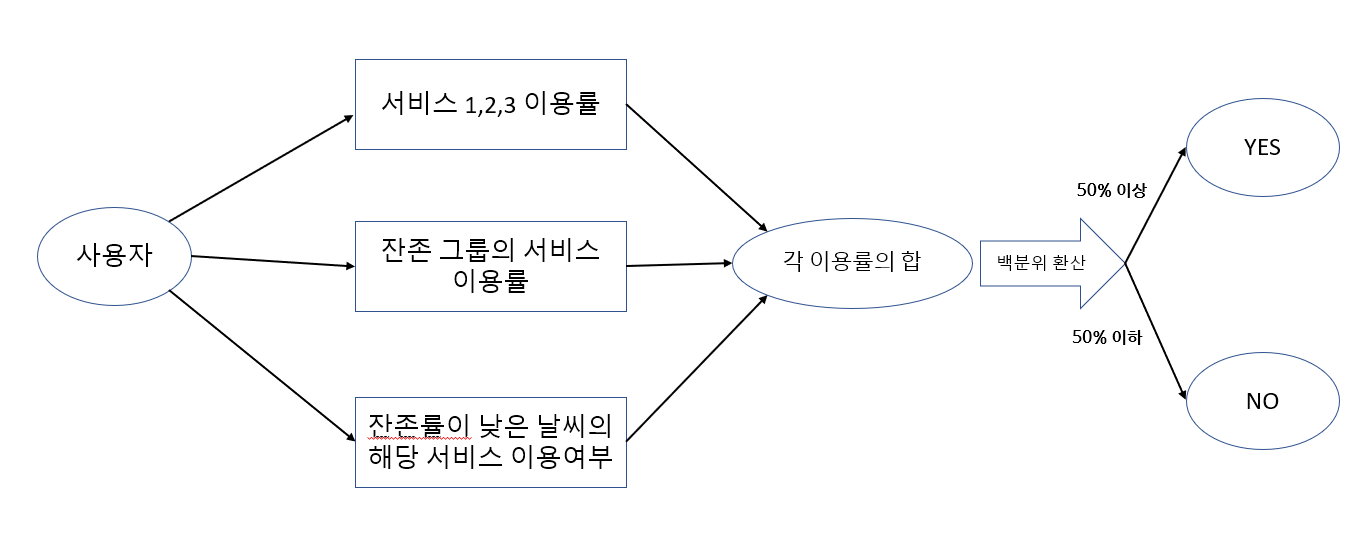


* 위 결과를 통해 현재 사용자들의 잔존률을 조사하여 잔존률이 저조한 사용자 집단에게 잔존률이 높은 집단의 이용 서비스를 어필하고 잔존률이 낮은 날씨에는 해당 날씨에 대한 컨텐츠를 제작 논의해야한다

### [리뷰어 답변]
#### 피드백
- 모델이 구성되는 과정을 개념적으로 설명하려 하신 것으로 보입니다. 전반적으로는 잘 표현하셨습니다만 각 이용률의 합이라는 부분은 모델에 따라 달라질 수 있는 부분으로 생각됩니다.

#### 개선이 필요한 부분
- 사용가능한 구체적인 모델의 예시를 들어 (예를 들어 로지스틱 회귀분석, 의사결정나무 등) 언급해주시면 더욱 좋겠습니다.




---

## Q. 4~6. 금융권 VIP 고객의 연간 소비금액을 예측하기 위한 모델 구축 작업

### 배경 및 목표
금융권의 한 기업에서 VIP 고객들의 연간 소비금액(단위: 원)을 예측하기 위한 모델을 만들고 있다. 영업팀은 이 예측모델을 새로운 고객관리시스템에 도입하고자 준비하고 있다. 분석가의 목표는 기존 VIP 고객들의 소비금액을 기반으로 새로운 VIP 고객의 연간 소비금액(단위: 원)을 예측하는 것이다.

### 데이터셋
분석가에게 주어진 데이터셋의 컬럼은 아래와 같다. 

- 고객아이디(숫자형)
- 연봉(숫자형)
- 주소(문자) 
- 연간 소비금액 (숫자형, 단위: 원)
- 성별(문자)
- 계좌 잔고금액(숫자형, 단위: 원)

---

### 4. 입력 데이터(X, features)로 적절한 변수와 타깃 데이터(y, target, label)로 적절한 변수는 각각 무엇일까?

# 4번

입력데이터로 적당한 변수는 고객 아이디(숫자형),연봉(숫자형),주소(문자),성별(문자),
계좌 잔고(숫자)가 올 수 있고 타깃 데이터이 y는 고객의 연간 소비금액이 올 수 있다.



### [리뷰어 답변]
#### 피드백
- 타깃 데이터로 연간 소비금액을 잘 설정하셨습니다.
- 연봉, 주소, 성별, 계좌 잔고 등도 잘 선정하셨습니다.

#### 개선이 필요한 부분
- 고객 아이디의 경우 유의미한 변수가 아닌 유니크 ID입니다. 분석에서 제외되어야 합니다.






### 5. 지도학습(회귀), 지도학습(분류), 비지도학습, 강화학습 중에 어떤 모델을 적용할 것인가?

# 5번

지도학습(회귀) 모델이 적당하다고 생각한다 이유는 타깃 데이터인 연간 소비금액 데이터는
특정한 값만 가지는 이산형 변수가 아니라 연속한 범위 내에서 임의의 값을 가질 수 있기 
때문에 내년에 VIP의 소비모델을 예측해야하는 이 프로젝트에서는 지도학습(회귀) 모델을 사용해야한다

### [리뷰어 답변]
#### 피드백
- 잘 선정하셨습니다.






### 6. 생성된 모델이 학습 데이터에서는 성능이 높았으나 테스트 데이터에서 성능이 낮았다. 추정되는 이유는 무엇인가?

# 6번
테스트 데이터에서 성능이 낮은 이유는 여러가지 생각해 볼 수 있다 먼저 생각해볼 수 잇는 것은 데이터 분할을 할 때 검증/개발 데이터 세트를 균등하게 분할 하지 못해서 이 단계에서 하이퍼 파라미터를 제대로 튜닝하지 못해서 좋지않은 학습모델이 나온 것이다 따라서 학습데이터를 가지고 적당히 괜찮은 학습 모델이 나올 수 는 있지만 하이퍼 파라미터를 조절하지 않아서 테스트 데이터에서도 좋은 성능을 낼 수 없는 모델이 유추된 것이다


### [리뷰어 답변]
#### 피드백
- 하이퍼 파라미터를 효과적으로 선택하기 위한 방법과 그 중요성을 잘 파악하고 계십니다.

#### 개선이 필요한 부분
- 모형의 과적합에 대한 언급이 필요합니다. 하이터 파라미터를 튜닝하는 과정은 이를 해결하기 위한 과정이나, 좀 더 근본적인 이유에 대한 접근을 해주시는 것이 해당 문항의 의도로 보입니다.








---

## 7~8.  유저 세분화 및 그룹핑을 위한 데이터 분석 작업

### 배경 및 목표
전체 소비자를 대상으로 한 마케팅 비용 및 리소스가 매우 큰 것으로 나타남에 따라, 전체 소비자를 세분화하여 그룹을 만든후 특정 그룹을 대상으로 마케팅을 진행하고자 한다. 분석가의 역할은 주어진 아래 데이터셋을 가지고 소비자를 세분화된 결과를 마케팅팀에 공유하는 것이다.

### 데이터셋

- 유저 아이디(숫자형)
- 방문당 평균 결제횟수 (숫자형)
- 방문당 공유 횟수 (숫자형)
- 재방문율 (숫자형)


---

### 7. 지도학습(회귀), 지도학습(분류), 비지도학습, 강화학습 중에 어떤 모델을 적용할 것인가? 이유는 무엇인가?

# 7번

이 데이터 분석작업의 목표는 소비자들을 세분화하여 여러 그룹으로 만들어서 그 그룹에 맞춤 마케팅을 진행하고자 하는 것이다 여기 소비자를 그룹화하는 과정은 타깃값이 없는비지도 학습에 일부이다 이 비지도 학습에서 군집화가 이에 해당한다 각 데이터 셋 유저아이디,방문당 결제횟수,공유횟수,재방문률을 입력으로 받아 각 입력 값들의 한점을 군집화를 이용해서 그룹으로 만든다.

### [리뷰어 답변]
#### 피드백
- 문항의 의도에 맞게 매우 잘 서술하셨습니다.

#### 개선이 필요한 부분
- 다만, 비지도 학습에서도, 유저아이디는 포함되지 않습니다.









### 8. 만약 위 변수를 가지고 명확히 소비자가 세분화되지 않는다면 어떻게 해결하는 것이 좋을까?

# 8번
만약에 명확히 소비자가 세분화 되지 않는다면 비지도 학습 중 이상치 탐지 방법을 이용하여 평균적인 포인트에 비해서 동떨어진 포인트들을 선별하여 제거한 후에 이를 다시 비지도 학습의 군집화를 이용하여 소비자를 세분화 한다면 좀 더 명확하게 소비자를 분류할 수 있을 것이다

### [리뷰어 답변]
#### 피드백
- 좋은 해결 방안입니다. 다만, 이러한 이상치를 제거하는 것이 모형을 구성하는 목적에 잘 부합하는지, 편향을 만들어내는 것은 아닌지 고민하신 후 제거하셔야 합니다. 클러스터링이 잘 되도록 하는 것이 이상치 제거의 주된 목적이 되어서는 안됩니다.
- 이외에도 데이터를 표준화하는 방법 등이 있습니다.





---

### 9. 머신러닝에서 손실함수는 모델의 학습과정에서 매우 중요한 역할을 한다. 이 역할에 대해 상세히 기술해보자. 그리고 회귀, 분류 각 문제별로 대표적인 손실함수를 예로 들어보자.

---

# 9번
손실함수에서 손실이란 실제 관측된 데이터 모델과 생성된 결과와 비교해서 발생하는 차이를 손실이라 말한다 손실함수는 입력값이 들어오면 이를 손실값으로 바꾸어 주는 함수를 말한다 회귀 모델에서 대표적으로 평균제곱오차(Mean Squared Error:MSE) 함수를 사용한다 식은 다음과 같다

- 평균제곱오차(Mean Squared Error:MSE)
이 손실함수는 기본적으로 모델의 출력값과 사용자가 원하는 출력 값 사이의 거리를 오차로 사용하기 때문에 거리를 평균내면 음수가 나와 오차가 실제보다 줄어드는 경우를 방지하기 위해 아래와 같이 제곱하여 사용한다
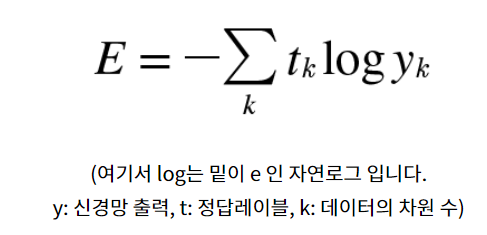


분류에서 쓰이는 대표적인 손실함수로는 교차 엔트로피 오차(Cross Entropy Error,CEE)를 많이 사용한다

- 교차 엔트로피 오차(Cross Entropy Error,CEE)
이 손실함수는 예측값과 실측값이one_hot_encoding 되어 있을 때 사용한다 one_hot_encoding 이란 찾고자 하는 대상의 값의 인덱스는 1로 표기하고 나머지 인덱슨는 0으로 표기하는 방식이다 아래 손실함수를 이용하여 예측값이 분류 모델에 가깔 울 수록 1에 가까워 지도록 되고 손실함수에 log가 취해져 있기 때문에 또 예측값과 실측값이 one_hot_encoding 되어 있기 때문에 영향을 거의 못준다 따라서 아래 식에서는 정답일 때 log(1)=0 이기 때문에 손실함수가 0에 가까워 지고 y가 0에 가까워 질 수 록 그 값은 무한대로 커진다.
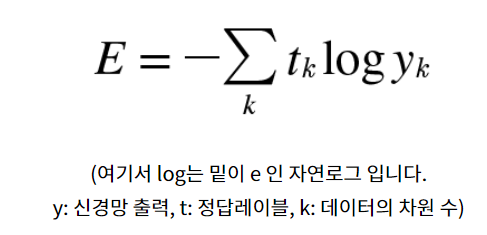




### [리뷰어 답변]
#### 피드백
- 잘 서술하셨습니다.

#### 개선이 필요한 부분
- 다만, 평균제곱오차의 수식의 경우 잘못 포함시키신 것으로 생각됩니다.



---

## 10~11. Gradient Descent의 과정과 SGD, MGD 처리 방식의 이해

--- 

### 10. Gradient Descent 는 손실함수를 최소화하는 Weight을 찾아내기 위해 점진적으로 진행하는 최적화 방법중 하나이다. 경사하강법을 통해 손실함수 값을 최소화하는 과정을 간단히 기술해보자.

# 10번
손실함수 L이 있을 때 이 손실함수에서 예측을 시작한 w1 값이 있다 이때 손실함수를 weight로 미분하면 그에 해당하는 손실함수에 기울기가 나오는데 이 기울기에 반대방향으로 그러니까 기울기 값이 +면 - 방향으로 -면 + 방향으로 w1값을 아주 조금씩 수정해서 손실함수의 값을 최소로 줄여 나간다

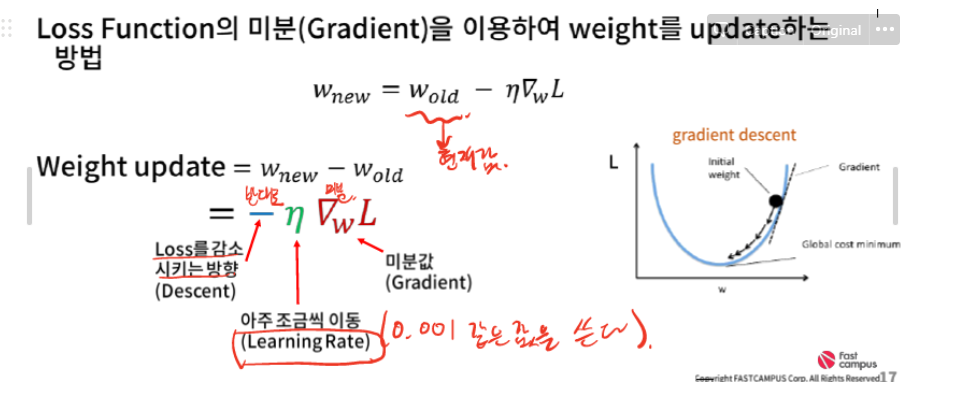

 위 그림을 예시로 들면 W(old) 값은 초기 값이라고 볼 수 있고 여기서 시작하여 미분을 통해 W(new) 값을 L이 작아지는 방향으로 수정하면서 최적의 w값을 찾아내는 것이다 그러나 이 방식의 문제점은 Gradient Descent 방식이 greedy한 알고리즘이기 때문에 최소값을 찾아도 그 값이 local minimum 일 수 도 있다 이를 방지하기 위해서 예초에 손실함수가 Convex function(볼록 함수) 일 경우인지 체크하고 Gradient Descent 방식을 이용하여 weight값을 찾아 내는 것이 좋다


### [리뷰어 답변]
#### 피드백
- 개념을 잘 이해하고 계십니다.




### 11. 많은 데이터에 대해 한번에 Gradient Descent 를 적용했을 때(즉 Batch 처리) 학습에 시간이 오래 걸리는 문제가 발생한다. 따라서 Stochastic, Mini-batch Gradient Descent 과 같은 방법들을 사용하는데, 각 방법들에 대해 기술해보자.

# 11번

- Stochastic 방식은 batch방식 처럼 데이터를 통째로 적용하는 것이 아니라 데이터를 1개씩 GD를 하고 모델을 수정해가는 방식이다 이 모델의 단점은 
속도는 빠르지만 가끔씩 튀는 데이터로 인해 네트워크 모델이 이상한 방향으로 갈 수 잇다 

- Mini-Batch 방식은 Batch/Stochastic 의 중간 형태로 데이터를 n개 뽑고 그 n개의 data에 대한 loss를 계산하여 더한 뒤 이를 이용하여 GD를 하고 모델을 수정해가는 방식이다 여기서 n을 매우 작은 값으로 해서 batch 처리 하였을 때 속도가 줄어드는 것을 보완한 것이다



### [리뷰어 답변]
#### 피드백
- 종류와 차이점에 대하여 잘 서술하셨습니다.





---

## 12~13. 오버피팅 개념 및 해결방법에 대한 이해


---

### 12. 머신러닝 모델을 구축하기 위해 전체 데이터를 학습셋, 검증셋, 테스트셋으로 분리시키는데 이렇게 분리시키는 목은 무엇이며, 각 데이터셋의 이용 목적을 기술해보자.

# 12번

모델을 구축하기 위해 전체 데이터를 학습셋, 검증셋, 테스트셋으로 분리하는 이유는 최종 산출 모델의 정확성을 높이기 위한 목적이다.
이제 각 데이터 셋의 목적을 알아본다
- 학습 데이터 셋
모델 자체를 생성하기 위한 데이터 셋으로 모델의 파라미터를 추정하기 위해 소모되는 데이터 이다 이 데이터는 한번 모델을 만들기 위해 사용되면 다시 사용할 수 없다.

- 검증 개발 셋
위 학습데이터를 통해 나온 모델의 하이퍼 파라미터를 튜닝하기 위한 데이터 셋이다 

- 테스트 셋
최종적으로 생성된 모델의 정확도를 측정하기 위한 데이터 셋이다 이 데이터 셋은 x(입력)만 있다고 가정하고 테스트를 실행한다 이 실행한 결과와 제외시킨 결과 값을 기준으로 정확도를 측정한다



### [리뷰어 답변]
#### 피드백
- 각 데이터의 목적을 잘 이해하고 계십니다.
- 하이퍼 파라미터에 대한 서술은 좋습니다.

#### 개선이 필요한 부분
- 과적합 개념와 하이퍼파라미터를 연결하여 설명해주시면 더 좋은 서술이 될 것입니다.



### 13.  과적합(Overftting)이 발생했을 때 이를 해결할 수 있는 방안은 무엇이 있을지 작성해보자.

# 13번
과적합 (Overfitting )이란 너무 최적화된 모델을 만들어 내서 일반화의 성능이 떨어지는 경우를 말한다 이를 해결하기 위해서는 단순히 데이터 양을 늘리는 방법이 있지만 이 방식은 쉽지가 않다 따라서 다음 3가지 방식을 이용한다 L1/L2 Reularization,Dropout,Batch Normalization


### [리뷰어 답변]
#### 피드백
- 해결 방안을 잘 언급하셨습니다.






---

## 14~15. CNN 및  RNN 의 동작원리에 대한 이해와 활용

---

### 14. 주로 이미지 인식을 위해 가장 널리 알려진 CNN(Convolutional Neural Network)의 학습과정에 대해 간단히 기술해보자.

# 14번

CNN의 구성은 일반적으로 convolution layer. pooling layer, fully-connected layer 으로 구성되어있다 이미지가 들어오면 Feature추출하고 이 Feature의 모음을 convolution layer 라고 한다 이 convolution layer의 모음에서 중요한 부분만을 뽑아서 pooling layer을 구성한다.마지막으로 모인 이 pooling layer를 종합하여 fully-connected layer를 구성하고 이 layer를 기반으로 class를 판단한다 이 판단한 내용을 기반으로 이미지를 인식한다




### [리뷰어 답변]
#### 피드백
- 각 레이어의 역할을 잘 설명하셨습니다.

#### 개선이 필요한 부분
- 필터를 활용하여 이미지의 특정 구역의 정보를 Feature로 구성하는 부분에 대한 언급이 있으면 더 좋겠습니다..







### 15. RNN(Recurrent Neural Network)의 개념과 대표적인 문제점, 해결방법에 대해 기술해보자.

# markdown 으로 작성 (공백포함 / 200자 이상 작성을 추천)

어떤 일렬의 과정(앞뒤의 상관 관계)을 가지고 구성되어 있는 데이터를 시퀸스라고 한다 이 관계를 고려하여 입력 데이터의 상태를 기억하고 있다가 이를 기반으로  다음 데이터의 결과를 예측하는 과정으 RNN 이라고 한다 보통 번역과정에 사용된다.이 방식의 문제점은 시퀸스가 길어지면 성능이 떨어지고 학습이 잘안되다,또 오래전 입력에 대해서는 저장이 잘 되지 않느다 이런 문자를 해결하기 위해 LSTM(Long Short Term Memoty),GRU(Gated Recurrent Unit) 두가지가 있다

- LSTM(Long Short Term Memoty) 
RNN은 시퀸스가 길어질 경우 역전파시 그래디언트가 점차 줄어 학습능력이 크게 저하된다.이를 vanishing gradient problem이라고 한다 이를 해결하기 위한 방식으로 state에 cell state와 히든 state를 구성하여 이전 GD과정을 통한 값을 기억하고 있다가 역전파 시 반영하는 방법이다 


- GRU(Gated Recurrent Unit)
LSTM의 방식과 비슷하지만 더 간략하게 구현된 버전이다


### [리뷰어 답변]
#### 피드백
- 잘 서술하셨습니다.
